In [1]:
# download the dataset

### Lesson 1: check torch working

In [1]:
import torch

In [2]:
a = torch.tensor(1.5)
b = torch.tensor(2.5)

In [3]:
c = torch.add(a, b)
print(c)

tensor(4.)


### Lesson 2: building first multilayer perceptron

In [4]:
import torch.nn as nn

In [5]:
model = nn.Sequential(
    nn.Linear(8, 12),
    nn.ReLU(),
    nn.Linear(12, 20),
    nn.ReLU(),
    nn.Linear(20, 8),
    nn.ReLU(),
    nn.Linear(8, 1),
    nn.Sigmoid()
)

In [6]:
print(model)

Sequential(
  (0): Linear(in_features=8, out_features=12, bias=True)
  (1): ReLU()
  (2): Linear(in_features=12, out_features=20, bias=True)
  (3): ReLU()
  (4): Linear(in_features=20, out_features=8, bias=True)
  (5): ReLU()
  (6): Linear(in_features=8, out_features=1, bias=True)
  (7): Sigmoid()
)


### Lesson 3: Training the model

In [7]:
import numpy as np
import torch.optim as optim

In [8]:
dataset = np.loadtxt("pima-indians-diabetes.data.csv", delimiter=",")
X = dataset[:, :-1]
y = dataset[:, -1]
print(X[0])

[  6.    148.     72.     35.      0.     33.6     0.627  50.   ]


In [9]:
# convert to tensor
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32).reshape(-1, 1)

In [10]:
# loss function and optimizer
loss_fn = nn.BCELoss() # binary crossentropy
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [11]:
# epochs and batch size
n_epochs = 100
n_batch = 10

In [12]:
# training the model
for epoch in range(n_epochs):
    for i in range(0, len(X), n_batch):
        X_batch = X[i:i+n_batch]
        y_batch = y[i:i+n_batch]
        y_pred = model(X_batch)
        loss = loss_fn(y_pred, y_batch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print(f"finished epoch {epoch}, latest loss {loss}")

finished epoch 0, latest loss 0.5446743369102478
finished epoch 1, latest loss 0.5260037183761597
finished epoch 2, latest loss 0.5127984881401062
finished epoch 3, latest loss 0.508721113204956
finished epoch 4, latest loss 0.5109131336212158
finished epoch 5, latest loss 0.5034124255180359
finished epoch 6, latest loss 0.46182358264923096
finished epoch 7, latest loss 0.44652530550956726
finished epoch 8, latest loss 0.4514227509498596
finished epoch 9, latest loss 0.46018216013908386
finished epoch 10, latest loss 0.43739941716194153
finished epoch 11, latest loss 0.4404493570327759
finished epoch 12, latest loss 0.43745532631874084
finished epoch 13, latest loss 0.437538206577301
finished epoch 14, latest loss 0.4388316571712494
finished epoch 15, latest loss 0.41393670439720154
finished epoch 16, latest loss 0.4186795949935913
finished epoch 17, latest loss 0.4280538856983185
finished epoch 18, latest loss 0.44443729519844055
finished epoch 19, latest loss 0.43324074149131775
fini

### Lesson 4: Running inference on the trained model

In [13]:
i = 5
X_sample = X[i:i+1]
y_pred = model(X_sample)
print(f"{X_sample[0]} -> {y_pred[0]}")

tensor([  5.0000, 116.0000,  74.0000,   0.0000,   0.0000,  25.6000,   0.2010,
         30.0000]) -> tensor([0.2652], grad_fn=<SelectBackward0>)


In [14]:
# better way of running inference
model.eval() # model in evaluation mode
with torch.no_grad(): # no gradient calculation
    y_pred = model(X_sample)
print(f"{X_sample[0]} -> {y_pred[0]}")

tensor([  5.0000, 116.0000,  74.0000,   0.0000,   0.0000,  25.6000,   0.2010,
         30.0000]) -> tensor([0.2652])


In [15]:
model.eval()
with torch.no_grad():
    y_pred = model(X)
accuracy = (y_pred.round() == y).float().mean()
print(f"The accuracy is {accuracy}")

The accuracy is 0.7825520634651184


### Lesson 5: Loading Data from Torchvision

In [16]:
import matplotlib.pyplot as plt
import torchvision

In [17]:
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True)

Files already downloaded and verified
Files already downloaded and verified


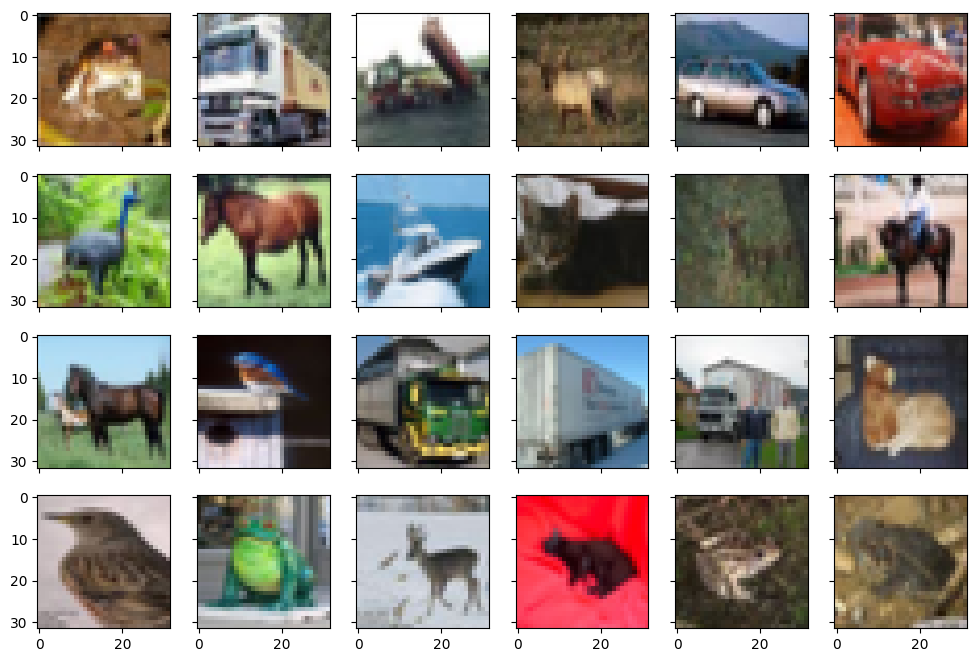

In [18]:
fig, ax = plt.subplots(4, 6, sharex=True, sharey=True, figsize=(12, 8))
for i in range(0, 24):
    row, col = i//6, i%6
    ax[row, col].imshow(trainset.data[i])
plt.show()

In [19]:
print(f"No. of trainset images {len(trainset.data)} and test set {len(testset.data)}")

No. of trainset images 50000 and test set 10000


### Lesson 6: Using pytorch dataloader

In [34]:
import time

In [20]:
from torchvision.datasets import CIFAR10

In [21]:
transform = torchvision.transforms.Compose([torchvision.transforms.ToTensor()])
trainset = CIFAR10(root='./data', train=True, download=True, transform=transform)
testset = CIFAR10(root='./data', train=False, download=True, transform=transform)

Files already downloaded and verified
Files already downloaded and verified


In [22]:
batch_size = 24
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=True)

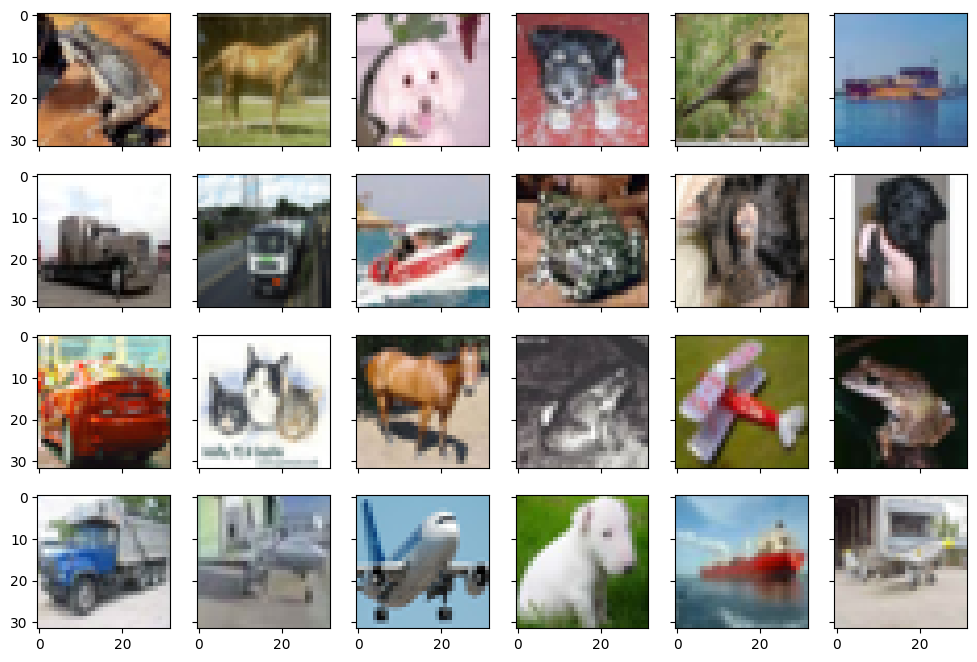

In [23]:
fig, ax = plt.subplots(4, 6, sharex=True, sharey=True, figsize=(12, 8))
for images, labels in trainloader:
    for i in range(batch_size):
        row, col = i//6, i%6
        ax[row, col].imshow(images[i].numpy().transpose([1, 2, 0]))
    break # take only first batch
plt.show()

### Lesson 7: Convolutional Neural Network

In [43]:
conv_model = nn.Sequential(
    nn.Conv2d(3, 32, kernel_size=(3, 3), stride=1, padding=1),
    nn.ReLU(),
    nn.Dropout(0.3),
    nn.Conv2d(32, 32, kernel_size=(3, 3), stride=1, padding=1),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=(2, 2)),
    nn.Flatten(),
    nn.Linear(8192, 512),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(512, 10)
)
print(conv_model)

Sequential(
  (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU()
  (2): Dropout(p=0.3, inplace=False)
  (3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (4): ReLU()
  (5): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  (6): Flatten(start_dim=1, end_dim=-1)
  (7): Linear(in_features=8192, out_features=512, bias=True)
  (8): ReLU()
  (9): Dropout(p=0.5, inplace=False)
  (10): Linear(in_features=512, out_features=10, bias=True)
)


### Lesson 8: Training the image classifier

In [44]:
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(conv_model.parameters(), lr=0.001, momentum=0.9)

In [45]:
n_epochs = 1

In [46]:
for epoch in range(n_epochs):
    tik = time.time()
    conv_model.train()
    for inputs, labels in trainloader:
        y_preds = conv_model(inputs)
        loss = loss_fn(y_preds, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    acc = 0
    count = 0
    conv_model.eval()
    with torch.no_grad():
        for inputs, labels in testloader:
            y_preds = conv_model(inputs)
            acc += (torch.argmax(y_preds, 1) == labels).float().sum()
            count += len(labels)
    acc /= count
    print(f"For epoch {epoch}, accuracy is {acc*100}%")
    print(f"Time taken for this epoch: {time.time()-tik}")

For epoch 0, accuracy is 39.709999084472656%
Time taken for this epoch: 496.6299979686737


### Lesson 9: Train with GPU

In [47]:
# training with gpu
n_epochs = 20

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
conv_model.to(device)

loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(conv_model.parameters(), lr=0.001, momentum=0.9)

for epoch in range(n_epochs):
    tik = time.time()
    conv_model.train()
    for inputs, labels in trainloader:
        y_preds = conv_model(inputs.to(device))
        loss = loss_fn(y_preds, labels.to(device))
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    acc = 0
    count = 0
    conv_model.eval()
    with torch.no_grad():
        for inputs, labels in testloader:
            y_preds = conv_model(inputs.to(device))
            acc += (torch.argmax(y_preds, 1) == labels.to(device)).float().sum()
            count += len(labels)
    acc /= count
    print(f"For epoch {epoch}, accuracy is {acc*100}%")
    print(f"Time taken for this epoch: {time.time()-tik} seconds")

For epoch 0, accuracy is 47.13999938964844%
Time taken for this epoch: 31.030004739761353 seconds
For epoch 1, accuracy is 50.43000030517578%
Time taken for this epoch: 30.46299409866333 seconds
For epoch 2, accuracy is 53.869998931884766%
Time taken for this epoch: 31.237001657485962 seconds
For epoch 3, accuracy is 56.79999542236328%
Time taken for this epoch: 30.086999893188477 seconds
For epoch 4, accuracy is 58.619998931884766%
Time taken for this epoch: 30.267998933792114 seconds
For epoch 5, accuracy is 59.67000198364258%
Time taken for this epoch: 30.289000749588013 seconds
For epoch 6, accuracy is 61.06999969482422%
Time taken for this epoch: 30.23900556564331 seconds
For epoch 7, accuracy is 62.36000061035156%
Time taken for this epoch: 30.141995429992676 seconds
For epoch 8, accuracy is 63.279998779296875%
Time taken for this epoch: 30.4260036945343 seconds
For epoch 9, accuracy is 64.0999984741211%
Time taken for this epoch: 30.614994049072266 seconds
For epoch 10, accuracy

In [49]:
torch.cuda.empty_cache()